# 675 project: RandomForest based experiments on ImageWoof.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import torchvision
from torchvision import transforms
import torch
import time
import matplotlib.cm as cm

In [2]:
#%cd ./Swin-Transformer

D:\ProgramData\JupyterNB\Project\Swin-Transformer


## Defining dataset and dataloader, using torchvision to build imagefolder datasets (automatically assign labels based on image folder)

In [4]:
img_size = 224
num_channels = 3

img_transform = transforms.Compose(
        [transforms.ToTensor(),
         #transforms.Grayscale(),
         transforms.Resize([img_size, img_size]),
        ])


imagenette_train = torchvision.datasets.ImageFolder("./imagewoof2_320/train",transform=img_transform)
imagenette_val = torchvision.datasets.ImageFolder("./imagewoof2_320/val",transform=img_transform)

num_train_imgs = (len(imagenette_train.imgs))
num_val_imgs = (len(imagenette_val.imgs))
num_train_imgs, num_val_imgs

In [8]:
train_loader = torch.utils.data.DataLoader(imagenette_train,
                                          batch_size=num_train_imgs,
                                          shuffle=True,
                                          num_workers=4,
                                          drop_last=True
                                          )
val_loader = torch.utils.data.DataLoader(imagenette_val,
                                          batch_size=num_val_imgs,
                                          shuffle=True,
                                          num_workers=4,
                                          drop_last=True
                                          )

## Loads entire dataset into memory (quite large)

In [89]:
t1=time.time()
X_train,Y_train = next(iter(train_loader_gray))
X_train = X_train.numpy()
Y_train = Y_train.numpy()
X_train.shape
loadtime = t1-time.time()

## Visualize dataset

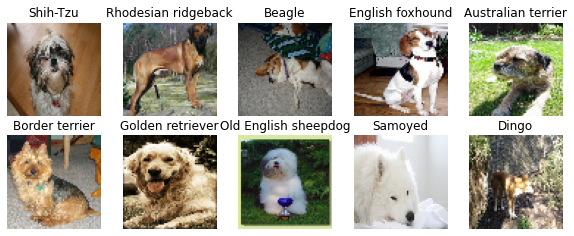

In [71]:
woof_labels = ['Shih-Tzu','Rhodesian ridgeback','Beagle','English foxhound','Australian terrier','Border terrier','Golden retriever','Old English sheepdog','Samoyed',
'Dingo']
fig10 = plt.figure(figsize = (10, 10))
d = 0
for r in range(5):
  for c in range(2):
    fig10.add_subplot(5, 5, d+1)
    idx = np.where(Y_train==d)[0][0]
    plt.imshow(X_train[idx].transpose([1,2,0]))
    plt.axis('off')
    plt.title(label = woof_labels[d], color = 'black')
    d = d+1  

## Create flattened image features

In [25]:
X_train2 = X_train
Y_train2 = Y_train
X_train2 = X_train2.reshape(-1,img_size*img_size*num_channels)
X_val2 = X_val2.reshape(-1,img_size*img_size*num_channels)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

## Fit random forest models for different max depths. Other parameters are left as default.

(Important one is n_estimator = 100)

In [29]:
times = []
acc_scores = []
val_scores = []

for i in range(10):
    t1 = time.time()
    clf = RandomForestClassifier(max_depth=i+1, random_state=0)
    clf.fit(X_train2, Y_train2)
    
    acc_scores.append( clf.score(X_train2,Y_train2))
    val_scores.append(clf.score(X_val2,Y_val2))
    t2 = time.time()-t1
    times.append(t2)
    

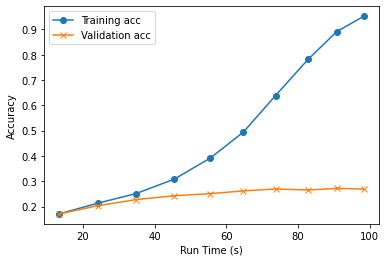

In [30]:
plt.plot(times,acc_scores,label = "Training acc",marker = 'o')
plt.plot(times,val_scores,label = "Validation acc",marker = 'x')
plt.ylabel("Accuracy")
plt.xlabel("Run Time (s)")
plt.legend()

## Overfitting
As can be seen, the training accuracies reaches 95%, the validatoin accuracies remain below 30%, a clear sign of overfitting for large max depths.

### However, since the validation accuracy is never high, we can't find "good-fit" by simply choosing a good max depth. This problem needs to be approached dataside. (Data complexity problem, not model complexity problem).

In [31]:
#Validation accuracies
val_scores

[0.17129040468312548,
 0.20412318656146602,
 0.22779333163654875,
 0.2430643929753118,
 0.25146347671163144,
 0.2621532196487656,
 0.2697887503181471,
 0.26571646729447695,
 0.2720794095189616,
 0.2695342326291677]

In [33]:
#Training accuracies
acc_scores

[0.17185595567867035,
 0.21385041551246536,
 0.25163434903047094,
 0.30880886426592796,
 0.3918005540166205,
 0.494404432132964,
 0.6385595567867036,
 0.7810526315789473,
 0.8913019390581718,
 0.9516897506925208]

## Confusion Matrix

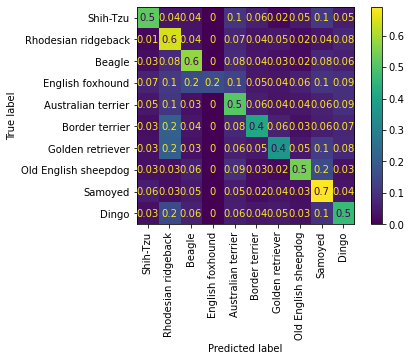

In [76]:
X_train_pred2 = clf2.predict(X_train2)
train_cm2 = confusion_matrix(X_train_pred2,Y_train2)

ConfusionMatrixDisplay.from_predictions(Y_train2,X_train_pred2,xticks_rotation = 'vertical', normalize = 'true',display_labels = woof_labels,values_format='.1g')